# Lumber Prices

* **Data:** `lumber-prices.csv`
* **Description:** Chicago lumber futures per 1000 board feet, in USD, as of some time in 2021. To keep things simple, we're going to say that this is the measurement over a month instead of just one date per month. Basically: each month, how much you'd pay if you bought 125 2x4 boards at the hardware store.
* **Source:** https://tradingeconomics.com/commodity/lumber
* **Columns of interest:**
    * `Open` is the price at the start of the month
    * `High` is the high price over the course of the month
    * `Low` is the low number over the course of the month
    * `Close` is the number at the end of the month

## Read in your data

In [4]:
import pandas as pd
df = pd.read_csv("lumber-prices.csv")
df

,open,high,low,close,date
0,$407.00,$424.70,$377.00,$424.70,1996-12-09T00:00:00
1,$426.00,$450.50,$395.00,$411.40,1997-01-02T00:00:00
2,$408.50,$421.50,$382.10,$383.50,1997-02-03T00:00:00
3,$386.00,$389.70,$355.00,$380.50,1997-03-03T00:00:00
4,$378.00,$417.50,$376.50,$403.10,1997-04-01T00:00:00
...,...,...,...,...,...
295,$716.00,$825.60,$490.00,$621.20,2021-07-01T00:00:00
296,$623.10,$650.00,$448.00,$482.80,2021-08-02T00:00:00
297,$482.10,$659.70,$454.40,$627.50,2021-09-01T00:00:00
298,$637.10,$789.60,$588.50,$591.60,2021-10-01T00:00:00


## What is the earliest month in this dataset?

We only have one reading per month, so you could also read this as "what is the earliest date in the dataset"

In [6]:
df['date'].min()

'1996-12-09T00:00:00'

## What is the most recent month in this dataset?

We only have one reading per month, so you could also read this as "what is the earliest date in the dataset"

In [7]:
df['date'].max()

'2021-11-01T00:00:00'

## What 3 months had the highest high lumber price?

In [12]:
#3date#high	

df.sort_values(by="high", ascending=False).head(3)

,open,high,low,close,date
284,$595.00,$934.50,$584.10,$928.00,2020-08-03T00:00:00
289,$873.10,$912.20,$651.40,$887.00,2021-01-04T00:00:00
288,$641.20,$900.50,$633.00,$873.10,2020-12-01T00:00:00


## What 3 months had the lowest low lumber price?

In [13]:

df.sort_values(by="low", ascending=True).head(3)

,open,high,low,close,date
292,$1012.60,$1502.30,$1006.00,$1500.50,2021-04-01T00:00:00
293,$1520.60,$1711.20,$1201.00,$1309.50,2021-05-03T00:00:00
145,$168.70,$171.80,$137.90,$148.10,2009-01-02T00:00:00


## What is the median "high" lumber price in our dataset?

In [20]:
df['high'] = df['high'].str.replace("$","").astype(float)




/var/folders/lc/wd3z5xrd5s7cbp_lm8v3mkdm0000gn/T/ipykernel_7050/3815688810.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['high'] = df['high'].str.replace("$","").astype(float)


In [21]:
df['high']

0      424.7
1      450.5
2      421.5
3      389.7
4      417.5
       ...  
295    825.6
296    650.0
297    659.7
298    789.6
299    831.8
Name: high, Length: 300, dtype: float64

In [23]:
df['high'].median()

329.65

## What is the median "low" lumber price in our dataset?

In [24]:
df['low'] = df['low'].str.replace("$","").astype(float)
df['low'].median()

/var/folders/lc/wd3z5xrd5s7cbp_lm8v3mkdm0000gn/T/ipykernel_7050/1192251835.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['low'] = df['low'].str.replace("$","").astype(float)


286.1

## Plot the maximum "high" lumber price on an annual basis.

In [52]:
#high
#date
df['Year'] = pd.to_datetime(df['date'])

# df.Year.dt.strftime("%m%d")


# df.groupby("Year")["high"].max().plot(kind="bar")

<AxesSubplot: xlabel='Year'>

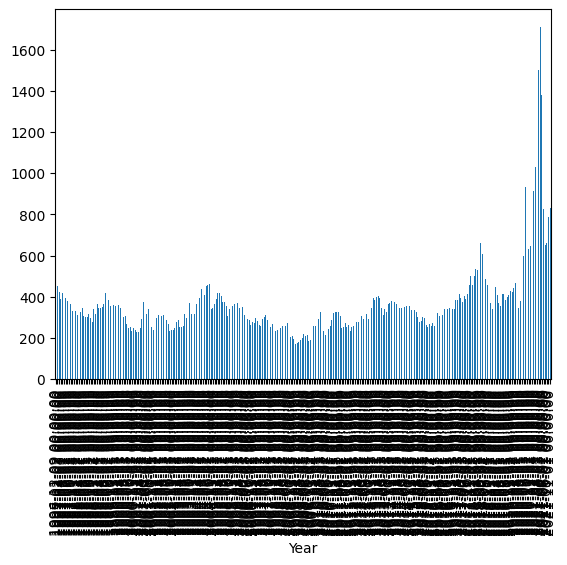

In [46]:
df.groupby("Year")["high"].max().plot(kind="bar")

#### Plot the lowest "low" lumber price on an annual basis.

<AxesSubplot: xlabel='Year'>

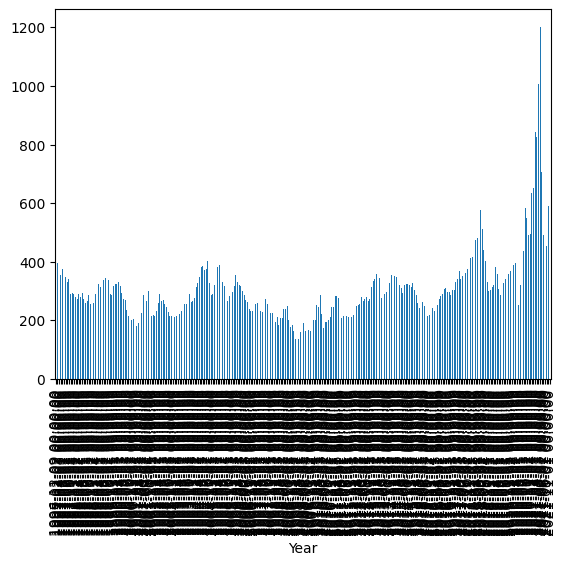

In [42]:



df.groupby("Year")["low"].min().plot(kind="bar")

In [ ]:
## Plot the median "close" lumber price on an quarterly basis.

In [ ]:
#close


## What month in our dataset had the largest swing between high and low?

You'll want to create a new column for this one

In [53]:
df["swing"] = df["high"] - df["low"]

#df['swing'].max()

df[df["swing"] == df["swing"].max()]

,open,high,low,close,date,Year,swing
294,$1315.00,1380.0,705.0,$716.00,2021-06-01T00:00:00,2021-06-01,675.0


## In how many months did lumber prices rise?

If the price was greater at the end of the month than the beginning of the month, we'll say the price rose.

In [55]:
df["rise"] = df["close"] > df["open"]


In [56]:
df

,open,high,low,close,date,Year,swing,rise
0,$407.00,424.7,377.0,$424.70,1996-12-09T00:00:00,1996-12-09,47.7,True
1,$426.00,450.5,395.0,$411.40,1997-01-02T00:00:00,1997-01-02,55.5,False
2,$408.50,421.5,382.1,$383.50,1997-02-03T00:00:00,1997-02-03,39.4,False
3,$386.00,389.7,355.0,$380.50,1997-03-03T00:00:00,1997-03-03,34.7,False
4,$378.00,417.5,376.5,$403.10,1997-04-01T00:00:00,1997-04-01,41.0,True
...,...,...,...,...,...,...,...,...
295,$716.00,825.6,490.0,$621.20,2021-07-01T00:00:00,2021-07-01,335.6,False
296,$623.10,650.0,448.0,$482.80,2021-08-02T00:00:00,2021-08-02,202.0,False
297,$482.10,659.7,454.4,$627.50,2021-09-01T00:00:00,2021-09-01,205.3,True
298,$637.10,789.6,588.5,$591.60,2021-10-01T00:00:00,2021-10-01,201.1,False


In [58]:
df["rise"].value_counts()

False    154
True     146
Name: rise, dtype: int64

## How many months did lumber prices drop?

If the price was lower at the end of the month than the beginning of the month, we'll say the price dropped.

In [65]:
df["drop"] = df["open"] < df["close"]

In [66]:
df["drop"].value_counts()

False    154
True     146
Name: drop, dtype: int64

## In 2020, how many months saw lumber prices rise vs lumber prices fall?

In [69]:

df[df["date"].str.contains("2020")]["rise"].value_counts()

df[df["date"].str.contains("2020")]["drop"].value_counts()

True     8
False    4
Name: drop, dtype: int64

## In 2000, how many months saw lumber prices rise vs lumber prices fall?

In [70]:
df[df["date"].str.contains("2000")]["rise"].value_counts()

df[df["date"].str.contains("2000")]["drop"].value_counts()

False    10
True      2
Name: drop, dtype: int64